## Non-parametric Test Procedures

A demographic survey resulted in the data saved in the file Uebung 08.csv.

1. Visualize the data with appropriate methods.
2. Do smokers earn different incomes than non-smokers?
3. Investigate whether educational background influences income.
4. The question arises whether the sample is representative regarding educational background. The proportions of the population are as follows:
        Low education levels: 0.2
        Working class: 0.3
        Employee class: 0.4
        Academic households: 0.1

In [1]:
# importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, chisquare
from scipy.stats.contingency import crosstab
import math

In [2]:
# Reading csv file into dataframe

url = 'D:\\Induktive Statistik\\Übungen am Rechner\\Übung 8\\Uebung-8.csv'

data = pd.read_csv(url, delimiter='\t')

# Looking at the data

data.head()

,i,Rauchgewohnheit,Einkommensklasse,Bildungsherkunft
0,1,Nichtraucher,0 bis 500,Akademiker
1,2,Nichtraucher,1.000 bis 2.000,Angestellte
2,3,Raucher,NaN,Angestellte
3,4,Raucher,2.000 bis 5.000,Bildungsferne Schichten
4,5,Nichtraucher,0 bis 500,Angestellte


In [3]:
# Since the table is in German, I want to translate it to English

# Checking for the unique values in each column to make sure I translate every existing value
data['Rauchgewohnheit'].unique()
data['Einkommensklasse'].unique()
data['Bildungsherkunft'].unique()

# Creating a translation dictionary for all the column names and cell contents
translation_to_english = {
    'Rauchgewohnheit': 'Smoking Habits',
    'Einkommensklasse': 'Income Class',
    'Bildungsherkunft': 'Educational Background',
    'Nichtraucher': 'Non-smoker',
    'Raucher': 'Smoker',
    'k.A.': 'n/a',
    '0 bis 500': '0 to 500',
    '500 bis 1.000': '500 to 1.000',
    '1.000 bis 2.000': '1.000 to 2.000',
    '2.000 bis 5.000': '2.000 to 5.000',
    'mehr als 10.000': 'over 10.000',
    'Akademiker': 'Academics',
    'Angestellte': 'Employee',
    'Arbeiterklasse': 'Working Class',
    'Bildungsferne Schichten': 'Educationally Disadvantaged Classes'
}

# Renaming the column names 
en_data = data.rename(columns=translation_to_english)

# Replacing the cell values
en_data = en_data.replace(to_replace=translation_to_english)

en_data

,i,Smoking Habits,Income Class,Educational Background
0,1,Non-smoker,0 to 500,Academics
1,2,Non-smoker,1.000 to 2.000,Employee
2,3,Smoker,NaN,Employee
3,4,Smoker,2.000 to 5.000,Educationally Disadvantaged Classes
4,5,Non-smoker,0 to 500,Employee
...,...,...,...,...
2835,2836,Non-smoker,2.000 to 5.000,Employee
2836,2837,Non-smoker,500 to 1.000,Working Class
2837,2838,Smoker,0 to 500,Academics
2838,2839,Non-smoker,2.000 to 5.000,Employee


### 1. Visualize the data with appropriate methods.

Smoking Habits
Non-smoker    1898
Smoker         897
n/a             45
dtype: int64


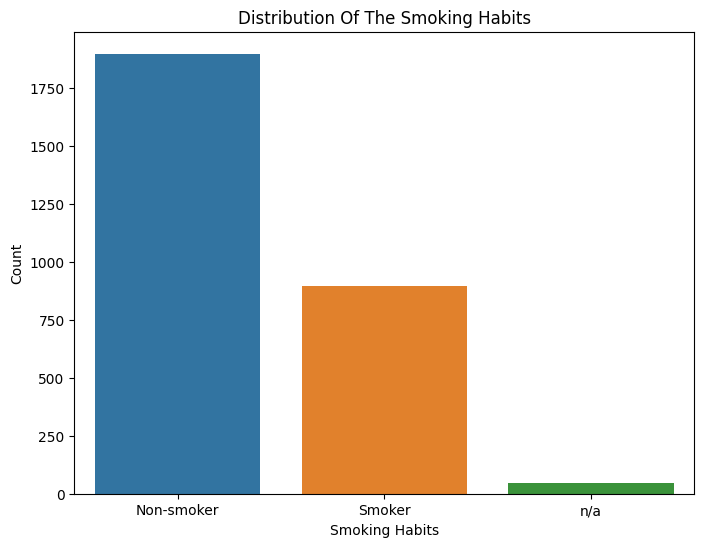

In [4]:
# Computing the absolut observations in each category.

absolut_count_smokers = en_data.groupby('Smoking Habits').size()

print(absolut_count_smokers)

# Creating a chart for the distribution of the attribute SMOKING HABITS
# The chart shows the absolut count of non-smokers, smokers and the count of people, who didn't want to specify. 

plt.figure(figsize=(8, 6))
chart_smokers = sns.countplot(data=en_data, x='Smoking Habits', hue='Smoking Habits', legend=False)
chart_smokers.set_title('Distribution Of The Smoking Habits')
chart_smokers.set_xlabel('Smoking Habits')
chart_smokers.set_ylabel('Count')
plt.show()

# We can see, that the majority of the people in our sample are non-smokers.

Income Class
0 to 500          284
1.000 to 2.000    652
2.000 to 5.000    942
500 to 1.000      696
over 10.000        20
dtype: int64


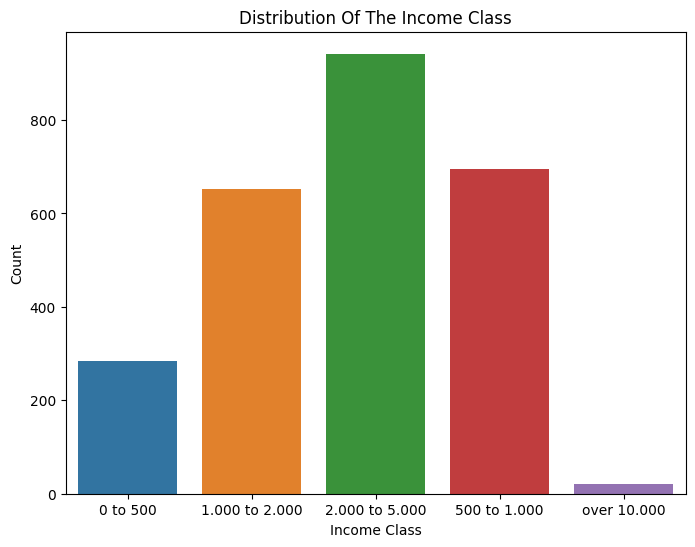

In [5]:
# Computing the absolut observations in each income class.

absolut_count_incomeclass = en_data.groupby('Income Class').size()

print(absolut_count_incomeclass)

# Creating a chart for the distribution of the income class.
# This chart shows us the absolut count of people in each income class.

plt.figure(figsize=(8, 6))
chart_income = sns.countplot(data=en_data, x='Income Class', hue='Income Class', legend=False)
chart_income.set_title('Distribution Of The Income Class')
chart_income.set_xlabel('Income Class')
chart_income.set_ylabel('Count')
plt.show()

# We can see, that the majority of the people in our sample earn between 2.000 to 5.000 Euros.
# The second highest income class in our sample is '500 to 1.000', closely followed by people who earn between 1.000 to 2.000.
# Third is the income class '0 to 500'.
# Only 20 people in our sample earn over 10.000 Euros.

Educational Background
Academics                              415
Educationally Disadvantaged Classes    600
Employee                               836
Working Class                          835
dtype: int64
2686


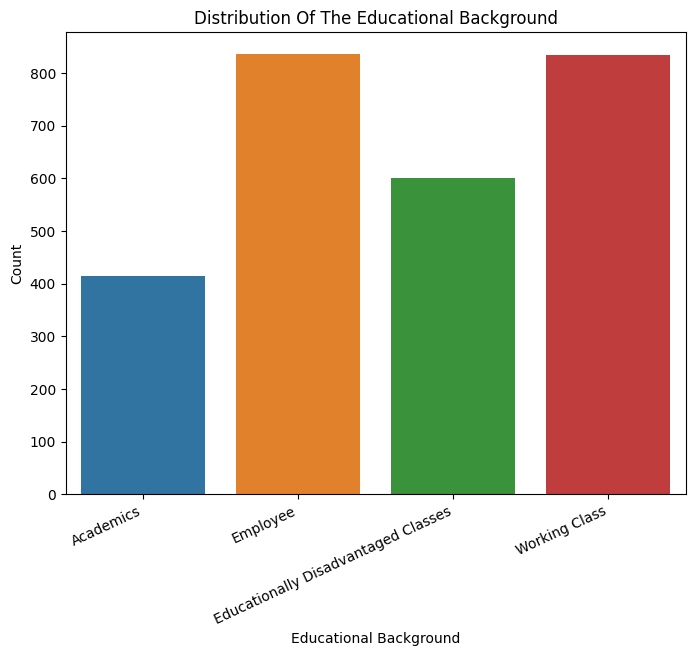

In [6]:
# Computing the absolut observations in each category.

absolut_count_education = en_data.groupby('Educational Background').size()

print(absolut_count_education)
print(absolut_count_education.sum())


# Creating a chart for the distribution of the educational background.

plt.figure(figsize=(8, 6))
chart_education = sns.countplot(data=en_data, x='Educational Background', hue='Educational Background', legend=False)
chart_education.set_title('Distribution Of The Educational Background')
chart_education.set_xlabel('Educational Background')
chart_education.set_ylabel('Count')
plt.xticks(rotation=25, ha='right')
plt.show()

# The majority of the people have an educationally disadvantaged background.
# Employee and Working Class is almost identically distributed, with the employee class having a higher amount by one person.
# Academics make up the smallest proportion of our sample.

Smoking Habits  Non-smoker  Smoker  n/a
Income Class                           
0 to 500               184      97    3
1.000 to 2.000         427     216    9
2.000 to 5.000         623     300   19
500 to 1.000           476     209   11
over 10.000             12       8    0


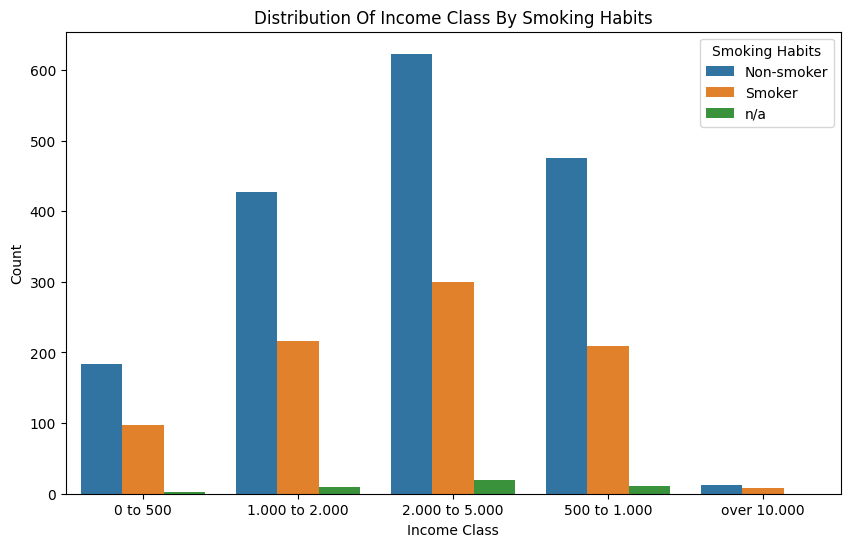

In [7]:
# Computing the observation count of the income class by smoking habit.

absolut_count_income_smoking = pd.crosstab(index=en_data['Income Class'], columns=en_data['Smoking Habits'])

print(absolut_count_income_smoking)

# Creating a chart for the distribution of the income class by the smoking habits.

plt.figure(figsize=(10, 6))
income_smoking = sns.countplot(data=en_data, x='Income Class', hue='Smoking Habits', legend=True)
income_smoking.set_title('Distribution Of Income Class By Smoking Habits')
income_smoking.set_xlabel('Income Class')
income_smoking.set_ylabel('Count')
plt.show()

# We can see that the percentage of non-smokers compared to smokers is higher in every income class.

Income Class                         0 to 500  1.000 to 2.000  2.000 to 5.000  \
Educational Background                                                          
Academics                                  49              90             132   
Educationally Disadvantaged Classes        49             126             208   
Employee                                   86             187             260   
Working Class                              90             211             291   

Income Class                         500 to 1.000  over 10.000  
Educational Background                                          
Academics                                      97            1  
Educationally Disadvantaged Classes           162            7  
Employee                                      228            3  
Working Class                                 170            8  


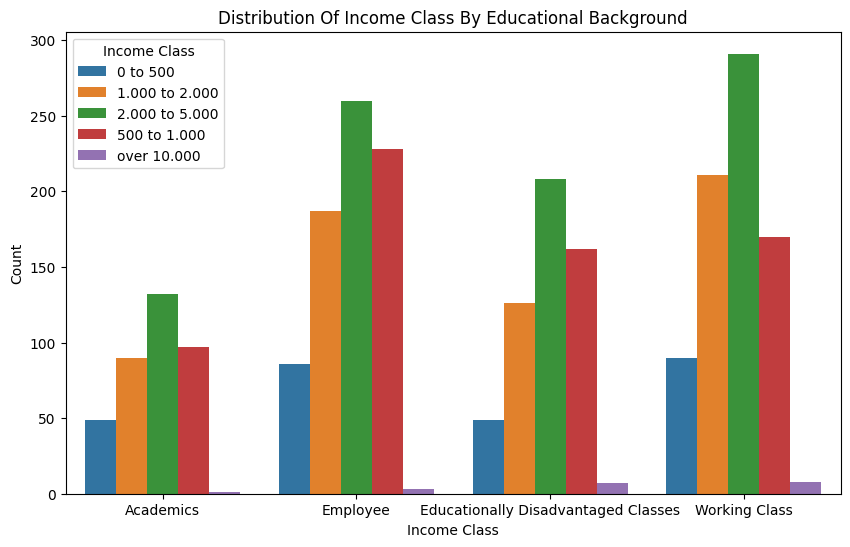

In [8]:
# Computing the the observations of each income class per educational background.

absolut_count_income_education = pd.crosstab(index=en_data['Educational Background'], columns=en_data['Income Class'])

print(absolut_count_income_education)

# Creating a chart for the distribution of the income by educational background.

plt.figure(figsize=(10, 6))
income_education = sns.countplot(data=en_data, x='Educational Background', hue='Income Class', legend=True)
income_education.set_title('Distribution Of Income Class By Educational Background')
income_education.set_xlabel('Income Class')
income_education.set_ylabel('Count')
plt.show()

# We can see that every single income class is represented in each educational background category.
# The working class has the highest amount of people earning over 10.000 Euros, closely followed by the educationally disadvantaged class.

Smoking Habits                       Non-smoker  Smoker  n/a
Educational Background                                      
Academics                                   270     140    5
Educationally Disadvantaged Classes         403     185   12
Employee                                    543     275   18
Working Class                               573     253    9


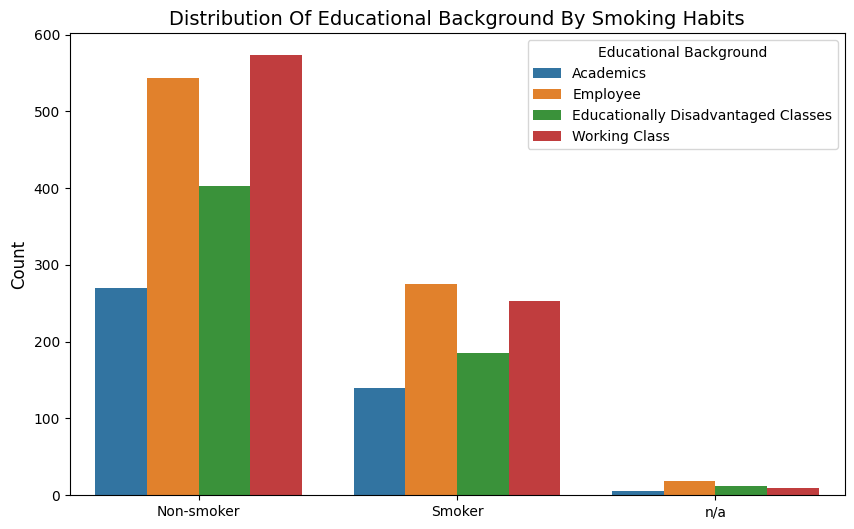

In [9]:
# Computing the observations of smoking habits by the educational background.

absolut_count_smoking_education = pd.crosstab(index=en_data['Educational Background'], columns=en_data['Smoking Habits'])

print(absolut_count_smoking_education)

# Creating a chart for the distribution of the educational background by smoking habit.

plt.figure(figsize=(10, 6))
smoking_education = sns.countplot(data=en_data, x='Smoking Habits', hue='Educational Background', legend=True)
smoking_education.set_title('Distribution Of Educational Background By Smoking Habits', fontsize=14)
smoking_education.set_xlabel('')
smoking_education.set_ylabel('Count', fontsize=12)
plt.show()

# Again, we can see that each eaducational background has smokers and non-smokers.

### 2. Do smokers earn different incomes than non-smokers?

The question is whether smokers and non-smokers have different incomes.
If their earnings differ, then their income distributions should also vary. 

If their earnings are identical, their income distributions should be the same.

Therefore, we are testing for homogeneity.

H0: Smokers and Non-Smokers have identical incomes.

H1: Smokers and Non-Smokers have different incomes.

Since the significance level is not given, I will choose alpha = 5 % to minimize beta and therefore the risk of accepting a false null hypotheses.

In [10]:
# Filtering the en_data table, to receive only the records for non-smokers and smokers.

table = en_data[en_data['Smoking Habits'].isin(['Non-smoker', 'Smoker'])]

# Deleting the null values in the column "incom class", so that no errors occur when employing scipy.stats.contingency.crosstab.

table = table.dropna(subset=['Income Class'])

# Creating the contingency table with the observed frequencies.

smokers_different_income = crosstab(table['Smoking Habits'], table['Income Class'])

observed = smokers_different_income.count  # saving only the count component of the crosstab result.

observed 

array([[184, 427, 623, 476,  12],
       [ 97, 216, 300, 209,   8]])

In [11]:
# Testing the hypotheses.

homogeneity_test = chi2_contingency(observed)

p_value = homogeneity_test.pvalue  # saving only the p value of the chi2_contingency result.

# Now comparing the p value from the chi2_contingency test with our significance level (alpha = 5%).

alpha = 0.05

if p_value >= alpha:
    print(f'p_value {p_value} > alpha {alpha}  => H0 cannot be rejected. The income distribution of Non-Smokers and Smokers is identical.')
else:
    print(f'p_value {p_value} <= alpha {alpha}  => H0 cannot must be rejected. The income distribution of Non-Smokers and Smokers is different.')

p_value 0.6234846894449965 > alpha 0.05  => H0 cannot be rejected. The income distribution of Non-Smokers and Smokers is identical.


### 3. Investigate whether educational background influences income.

We are testing the influence and therefore whether the variables 'educational background' and 'income class' are independent or not.
If they are not independent, they influence each other. 

For this, we use the Chi-Square Test of Independence.

H0: Educational Background and Income Class are independent.

H1: Educational Background and Income Class are not independent.


Since a significance level was not given, I will choose alpha = 5%, to minimize the risk of accepting a false null hypotheses.

In [12]:
# Checking if column educational background and income class have null values.
en_data.isna().sum()

i                           0
Smoking Habits              0
Income Class              246
Educational Background    154
dtype: int64

In [13]:
# droping rows with null values.

new_data = en_data.dropna()

In [14]:
# Creating the contingency table.

con_table = crosstab(new_data['Income Class'], new_data['Educational Background'])

count_observed = con_table.count   # saving only the count component of the crosstab result.

count_observed

array([[ 49,  49,  86,  90],
       [ 90, 126, 187, 211],
       [132, 208, 260, 291],
       [ 97, 162, 228, 170],
       [  1,   7,   3,   8]])

In [15]:
# Testing variables for independence.

independence_test = chi2_contingency(observed=count_observed)

result = independence_test.pvalue   # saving only the p value of the test result.

# Now comparing the p value result of the test with our alpha / significance level.

alpha = 0.05

if result > alpha:
    print(f'p value = {result} > alpha = {alpha}  -->  The null hypotheses cannot be rejected. Educational Background and Income Class are independent.')
else:
    print(f'p value = {result} <= alpha = {alpha}  -->  The null hypotheses must be rejected. Educational Background and Income Class are not independent.\nA correlation between Educational Background and the income exists.')

p value = 0.016786115682002327 <= alpha = 0.05  -->  The null hypotheses must be rejected. Educational Background and Income Class are not independent.
A correlation between Educational Background and the income exists.


### 4. The question arises whether the sample is representative regarding educational background. The proportions of the population are as follows:
        Academics: 0.1
        Educationally Disadvantaged Classes: 0.2
        Employee class: 0.4
        Working class: 0.3

We want to test whether the distribution of the educational background of our randomly selected sample is identical to that of the population.

For this we employ the Chi-Square Goodness of Fit Test.

H0: The distribution of our sample is idential to the one of the total population.

H1: The distribution of our sample differs from to the one of the total population.

I am choosing alpha = 5% to minimize the risk of accepting a false null hypotheses.

In [16]:
# Preparing / Transforming the parameters for the test.

# Computing the count observation of educational background and converting it into an array.
distribution_education = en_data.groupby(['Educational Background']).size().to_numpy()

distribution_education

array([415, 600, 836, 835], dtype=int64)

In [17]:
# Since we have the distribution of the population's educational background as a relative frequency, 
# we must convert this into absolute frequencies because our observed frequencies are given as absolute values.

# computing the sum of our observed frequencies.
total_observed = np.sum(distribution_education)

# Creating an array of the expected frequencies of the population.
expected_array_population = np.array([0.1, 0.2, 0.4, 0.3])

# Converting the populations frequencies from relative to absolut values.
absolut_distribution_population = expected_array_population * total_observed

absolut_distribution_population

array([ 268.6,  537.2, 1074.4,  805.8])

In [20]:
# Testing for independency. 
fit_test = chisquare(f_obs=distribution_education, f_exp=absolut_distribution_population)

p_value = fit_test.pvalue  # saving only the p value of the test result.


# Now comparing the p vlaue of the test result with our alpha.

alpha = 0.05

if p_value > alpha:
    print(f'pvalue = {p_value} > alpha = {alpha}  => H0 cannot be rejected. The distribution is identical and our selected sample is representative regarding the educational background.')
else:
    print(f'pvalue = {p_value} <= alpha = {alpha}  => H0 must be rejected. The distribution differs and our selected sample is not representative regarding the educational background.')



pvalue = 2.1961392336156766e-30 <= alpha = 0.05  => H0 must be rejected. The distribution differs and our selected sample is not representative regarding the educational background.
